# Proyek Analisis Data: Analisis Kualitas Udara di Wilayah Shunyi Berdasarkan Data PM2.5 (2013-2017)

- **Nama:** Rangga Djatikusuma Lukman
- **Email:** djatikusuma.data@gmail.com
- **ID Dicoding:** djatikusuma

## Menentukan Pertanyaan Bisnis



1.   Bagaimana distribusi tahunan dan tren jangka panjang PM2.5 selama periode 2013-2017?
2.   Bagaimana faktor suhu mempengaruhi konsentrasi PM2.5 selama periode 2013-2017?
1.   Bagaimana variasi konsentrasi PM2.5 antara hari kerja dan akhir pekan?
2.   Apakah ada perbedaan signifikan konsentrasi PM2.5 pada jam tertentu sepanjang hari?
1.   Bagaimana perbandingan variasi PM2.5 pada setiap musim?
2.   Bagaimana tren kualitas udara (PM2.5) di wilayah Shunyi selama periode 2013-2017?










## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for seaborn
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [38]:
data = pd.read_csv('/content/data/PRSA_Data_Shunyi_20130301-20170228.csv')

**Insight:**
- Dataset memuat data polutan udara (PM2.5, PM10, SO2, dll.) dan beberapa faktor lingkungan (suhu, tekanan udara, kelembaban, dsb.)
- Informasi waktu tersebar dalam kolom year, month, day, dan hour

### Assessing Data

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64 

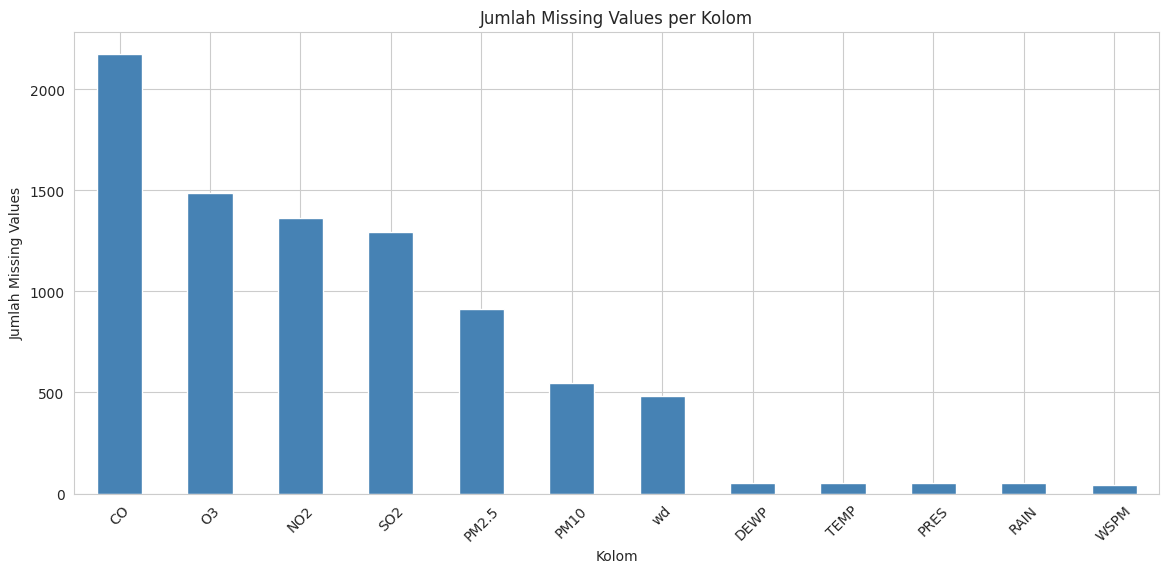

In [39]:
# Menampilkan 5 baris pertama
print(data.head())

# Melihat informasi umum dataset
data.info()

# Mengecek jumlah missing values
missing_values = data.isnull().sum()

# Membuat dataframe untuk visualisasi
missing_df = pd.DataFrame({
    'Missing Values': missing_values
})

# Menyaring kolom yang memiliki missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(14, 6))
missing_df.sort_values(by='Missing Values', ascending=False, inplace=True)
missing_df['Missing Values'].plot(kind='bar', color='steelblue')
plt.title('Jumlah Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Beberapa kolom memiliki missing values, terutama pada kolom PM2.5 dan PM10, yang perlu ditangani
- Data waktu (tahun, bulan, hari, dan jam) perlu dikombinasikan untuk analisis tren

### Cleaning Data

In [40]:
# Menggabungkan kolom waktu
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Menetapkan datetime sebagai index
data.set_index('datetime', inplace=True)

# Menghapus kolom yang tidak perlu
data.drop(columns=['year', 'month', 'day', 'hour', 'No', 'station'], inplace=True)

# Mengisi missing values hanya pada kolom numerik dengan rata-rata kolom
data.fillna(data.mean(numeric_only=True), inplace=True)

# Menghapus outlier
Q1 = data['PM2.5'].quantile(0.25)
Q3 = data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['PM2.5'] < (Q1 - 1.5 * IQR)) | (data['PM2.5'] > (Q3 + 1.5 * IQR)))]

summary_statistics = data.describe()
summary_statistics

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000
mean,67.160907,86.859976,12.475006,41.165188,1052.676950,56.503179,13.754348,1012.906095,2.538584,0.062542,1.841497
std,56.897461,69.742925,17.351371,27.263268,860.914001,53.877770,11.452638,10.253581,13.905932,0.769460,1.299425
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,19.000000,30.000000,2.000000,19.000000,400.000000,13.000000,3.400000,1004.500000,-9.200000,0.000000,1.000000
50%,53.000000,74.000000,5.000000,37.000000,900.000000,49.000000,15.000000,1012.400000,3.600000,0.000000,1.500000
75%,98.000000,126.000000,14.000000,57.000000,1300.000000,76.683600,23.500000,1021.000000,15.400000,0.000000,2.300000
max,242.000000,999.000000,207.000000,238.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


**Insight:**
- Data telah dibersihkan dengan menggabungkan kolom waktu dan mengisi nilai yang hilang dengan rata-rata
- Penghapusan outlier

## Exploratory Data Analysis (EDA)

## 1. Explore Data Distribusi PM2.5 Tahunan

In [6]:
# Rata-rata PM2.5 tahunan
yearly_avg = data.resample('YE')['PM2.5'].mean()
print(yearly_avg)

datetime
2013-12-31    69.469889
2014-12-31    72.421718
2015-12-31    66.155096
2016-12-31    61.822664
2017-12-31    61.830035
Freq: YE-DEC, Name: PM2.5, dtype: float64


**Insight:**
- Tren tahunan menunjukkan perubahan kualitas udara

## 2. Explore Data Hubungan Suhu dan PM2.5

In [7]:
# Korelasi PM2.5 dengan suhu
print(data[['PM2.5', 'TEMP']].corr())

          PM2.5      TEMP
PM2.5  1.000000 -0.008331
TEMP  -0.008331  1.000000


**Insight:**
- Dapat melihat korelasi positif/negatif antara suhu dan PM2.5.

## 3. Explore Variasi Hari Kerja vs Akhir Pekan

In [8]:
data['day_of_week'] = data.index.day_name()
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_avg = data.groupby('is_weekend')['PM2.5'].mean()
print(weekend_avg)

is_weekend
False    65.921945
True     70.266513
Name: PM2.5, dtype: float64


**Insight:**
- Konsentrasi PM2.5 lebih tinggi pada akhir pekan dibandingkan hari kerja.

## 4. Expoler Data Variasi Harian

In [37]:
hourly_avg = data.groupby(data.index.hour)['PM2.5'].mean()
print(hourly_avg)

datetime
0     75.252627
1     74.055313
2     71.931185
3     69.832690
4     68.148274
5     66.557297
6     64.198885
7     63.212393
8     63.766636
9     64.655709
10    66.164357
11    66.158142
12    65.395994
13    63.214251
14    62.752378
15    61.878798
16    59.970920
17    60.898599
18    62.826639
19    66.719006
20    70.966969
21    73.516266
22    75.759214
23    75.585795
Name: PM2.5, dtype: float64


**Insight:**
- Dapat mengidentifikasi waktu puncak polusi dalam sehari.

## 5. Explore Pola Data Musiman

In [10]:
data['season'] = data.index.month % 12 // 3 + 1
data['season_label'] = data['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

seasonal_avg = data.groupby('season_label')['PM2.5'].mean()
print(seasonal_avg)

season_label
Fall      68.504166
Spring    70.128975
Summer    63.814651
Winter    66.236686
Name: PM2.5, dtype: float64


**Insight:**
- Pola musiman menunjukkan PM2.5 lebih tinggi pada musim tertentu.

## 6. Explore Data Kelembaban

In [11]:
# Menambahkan kolom kategori kelembapan rendah, sedang, tinggi berdasarkan DEWP
data['humidity_level'] = pd.cut(data['DEWP'], bins=[-np.inf, 0, 10, np.inf], labels=['Low', 'Medium', 'High'])

# Rata-rata PM2.5 untuk tiap tingkat kelembapan
humidity_avg = data.groupby('humidity_level', observed=False)['PM2.5'].mean()

print(humidity_avg)

humidity_level
Low       58.662614
Medium    76.167731
High      72.576586
Name: PM2.5, dtype: float64


**Insight:**
- Melihat Rata-rata PM2.5 untuk tiap tingkat kelembapan

### 7. Explore distribusi data PM2.5

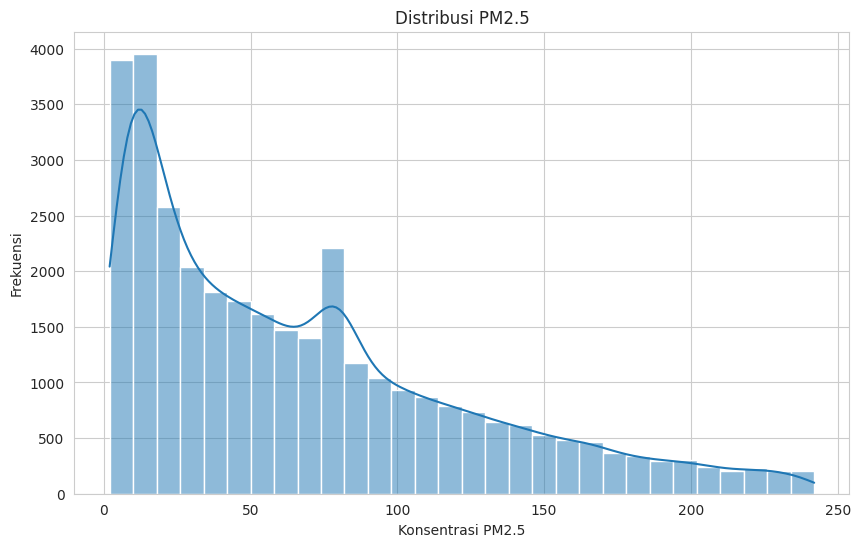

In [12]:
# Melihat distribusi data PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi PM2.5 menunjukkan adanya polutan tinggi pada waktu tertentu
- Distribusi yang tinggi pada konsentrasi PM2.5 mungkin menunjukkan polusi udara yang sering terjadi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi tahunan dan tren jangka panjang PM2.5 selama periode 2013-2017?

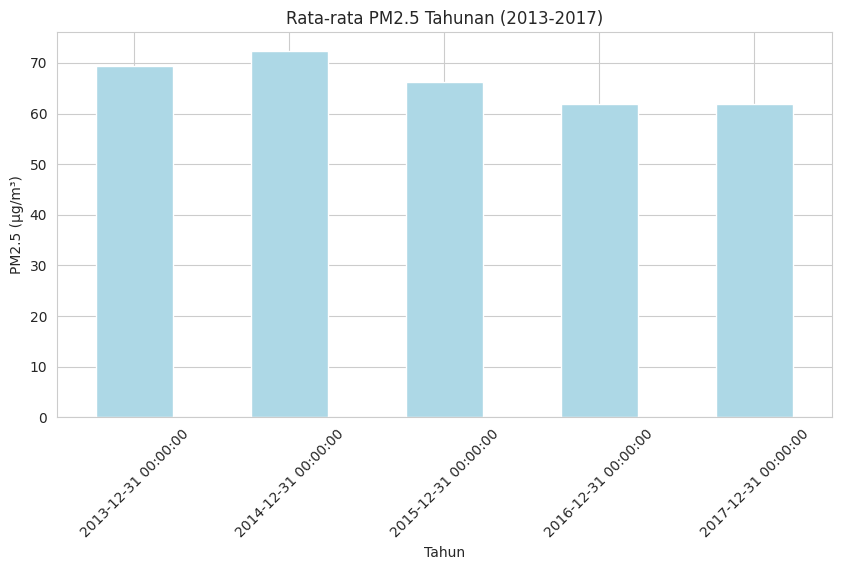

In [13]:
plt.figure(figsize=(10, 5))
yearly_avg.plot(kind='bar', color='lightblue')
plt.title('Rata-rata PM2.5 Tahunan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana faktor suhu mempengaruhi konsentrasi PM2.5 selama periode tersebut?

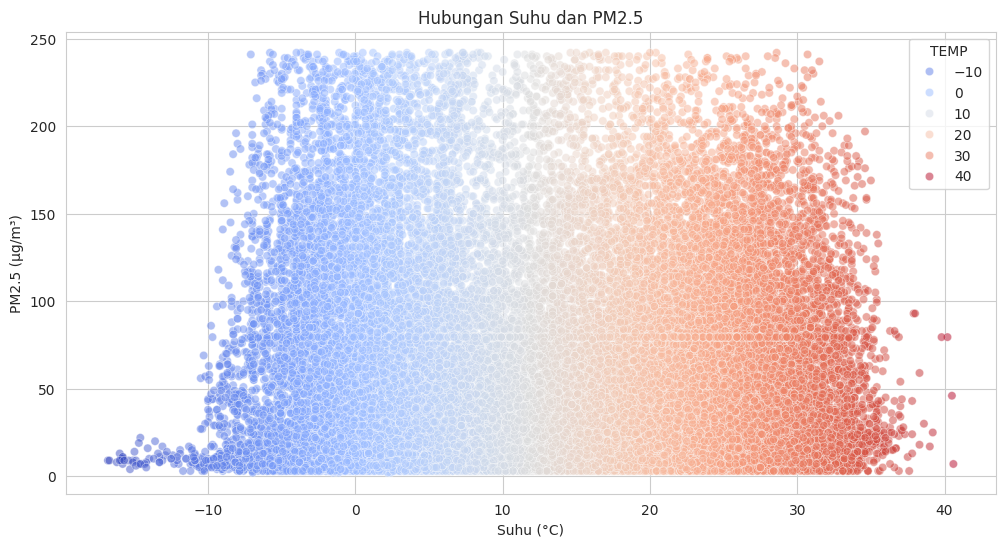

In [14]:
# melihat hubungan antara suhu dan PM2.5
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data, alpha=0.5, hue='TEMP', palette='coolwarm')
plt.title('Hubungan Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

### Pertanyaan 3: Bagaimana variasi konsentrasi PM2.5 antara hari kerja dan akhir pekan?

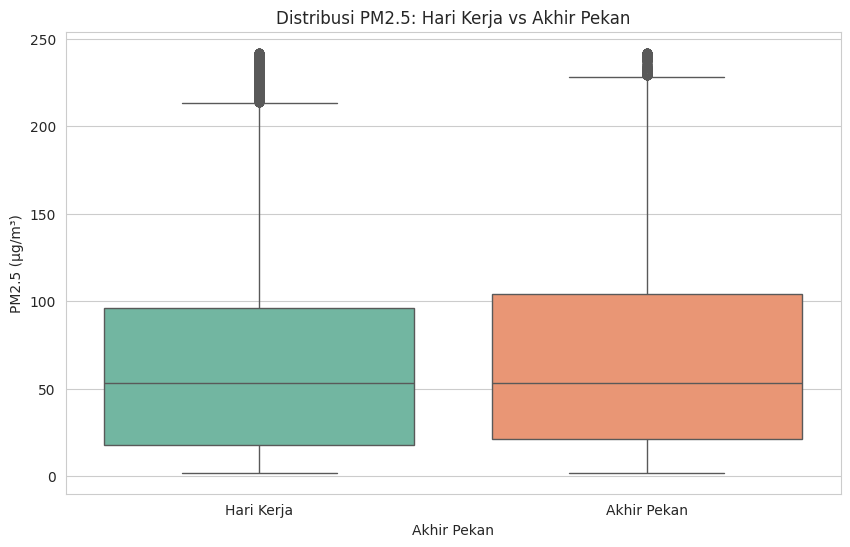

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='PM2.5', data=data, hue='is_weekend', palette='Set2', legend=False)
plt.title('Distribusi PM2.5: Hari Kerja vs Akhir Pekan')
plt.xlabel('Akhir Pekan')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks([0, 1], ['Hari Kerja', 'Akhir Pekan'])
plt.show()

### Pertanyaan 4: Apakah ada perbedaan signifikan konsentrasi PM2.5 pada jam tertentu sepanjang hari?

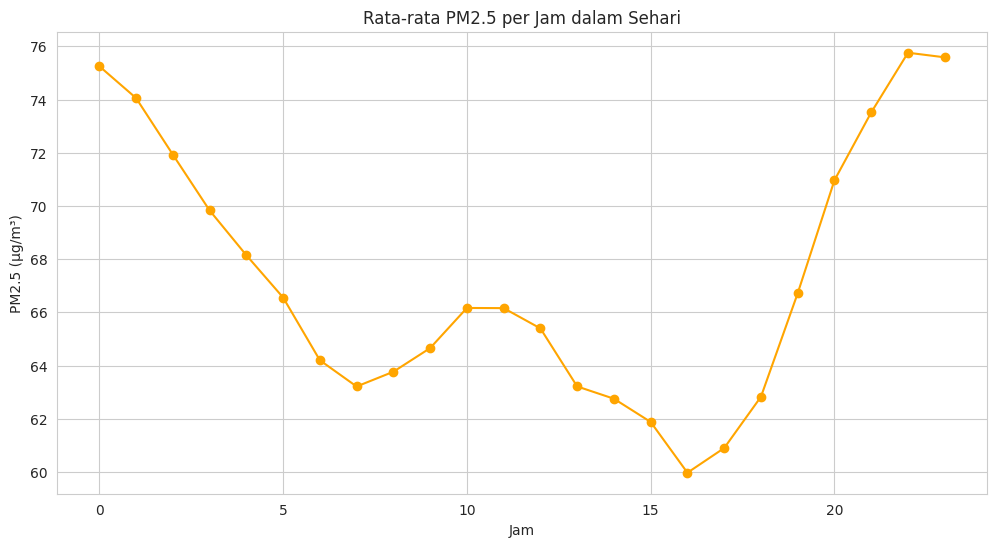

In [16]:
# Rata-rata PM2.5 per jam
hourly_avg = data.groupby(data.index.hour)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', marker='o', color='orange')
plt.title('Rata-rata PM2.5 per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 5: Bagaimana perbandingan variasi PM2.5 pada setiap musim?

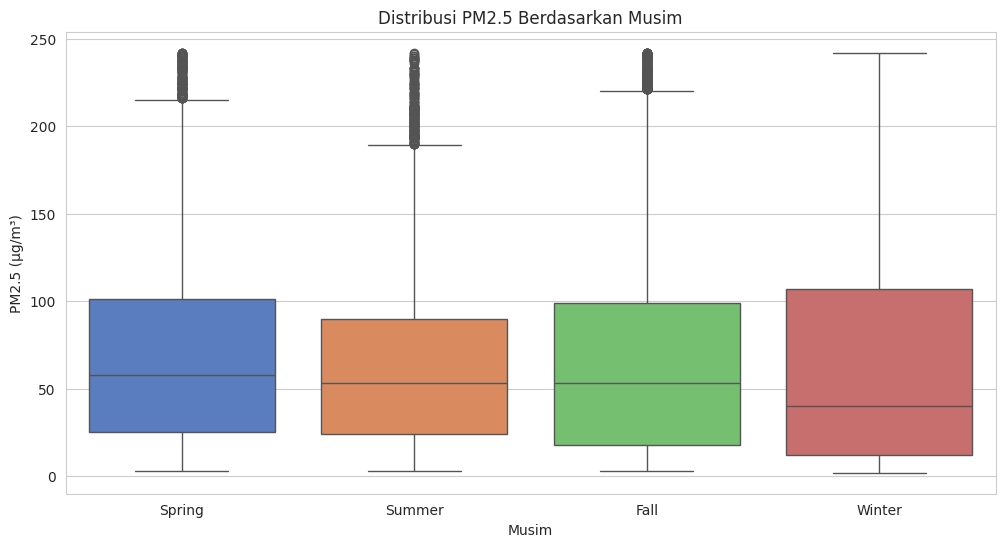

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season_label', y='PM2.5', data=data, hue='season_label', palette='muted', dodge=False, legend=False)
plt.title('Distribusi PM2.5 Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

### Pertanyaan 6: Bagaimana tren kualitas udara (PM2.5) di wilayah Shunyi selama periode 2013-2017?

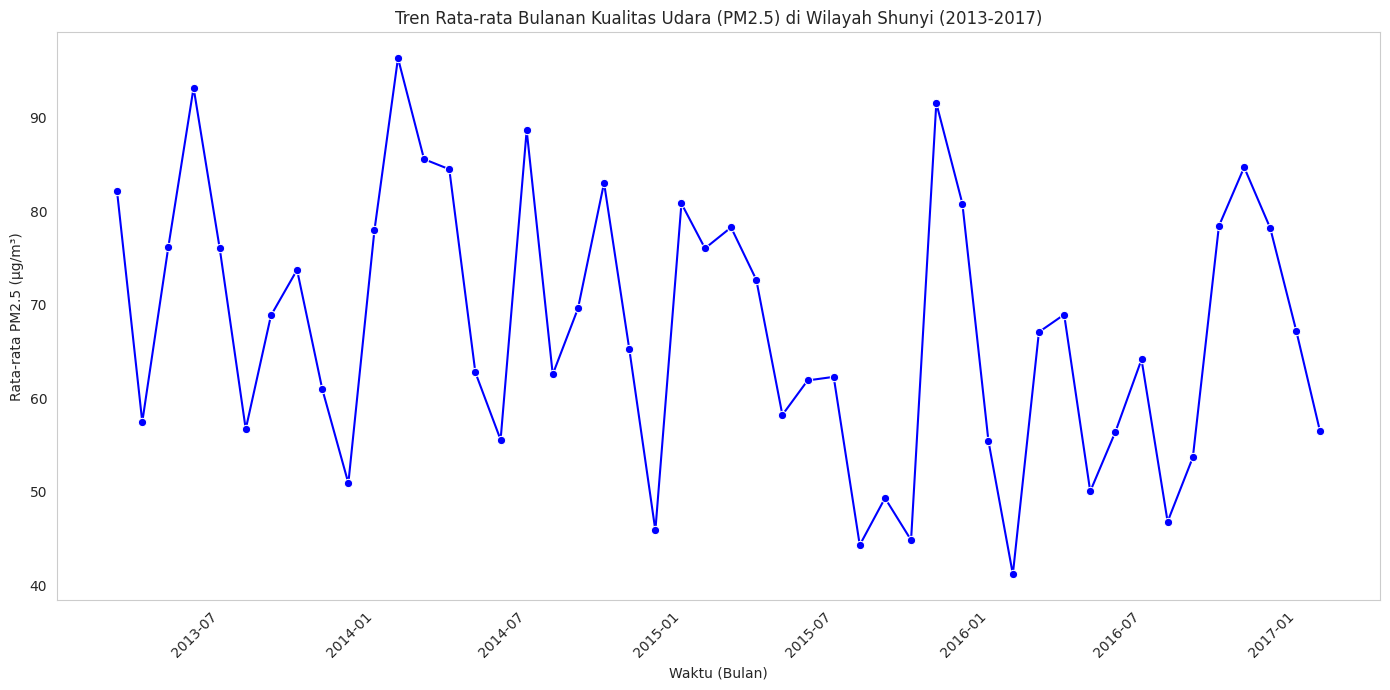

In [47]:
# Mengelompokkan data berdasarkan bulan untuk mendapatkan rata-rata PM2.5
monthly_avg_pm25 = data['PM2.5'].resample('ME').mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(14, 7))
sns.lineplot(x='datetime', y='PM2.5', data=monthly_avg_pm25, marker='o', color='blue')
plt.title('Tren Rata-rata Bulanan Kualitas Udara (PM2.5) di Wilayah Shunyi (2013-2017)')
plt.xlabel('Waktu (Bulan)')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**
- Data menunjukan tren konsentrasi PM2.5 berubah setiap tahun.
- Dapat melihat pola konsentrasi PM2.5 yang cenderung naik atau turun dengan suhu tertentu.
- Dapat membantu memahami konsentrasi PM2.5 yang memiliki perbedaan signifikan antara hari kerja dan akhir pekan.
- Dapat membantu melihat pada jam-jam tertentu dalam sehari di mana polusi udara cenderung lebih tinggi.
- Dapat memberikan gambaran variasi konsentrasi PM2.5 antara musim yang berbeda.
- Tren data menunjukkan adanya peningkatan atau penurunan polutan pada waktu-waktu tertentu, menunjukkan potensi adanya pola musiman.

## Analisis Lanjutan (Opsional)

## Clustering Analysis

### Berdasarkan Tingkat Polusi PM2.5

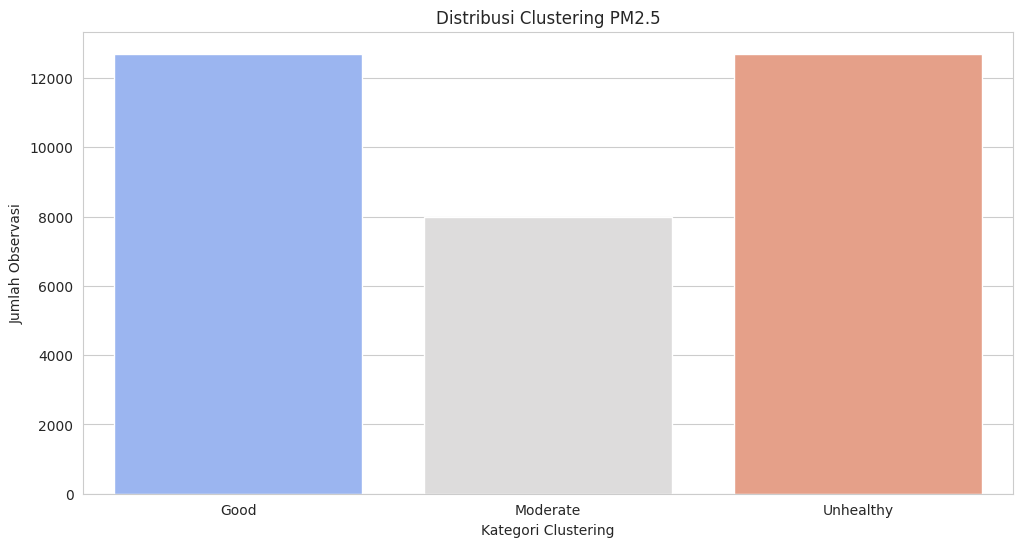

In [21]:
# Kategori clustering berdasarkan rentang nilai
def pm25_clustering(value):
    if value < 35:
        return 'Good'
    elif 35 <= value < 75:
        return 'Moderate'
    else:
        return 'Unhealthy'

# Buat kolom cluster pada dataset
data['PM2.5 Cluster'] = data['PM2.5'].apply(pm25_clustering)

# Plot visualisasi distribusi cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='PM2.5 Cluster', data=data, hue='PM2.5 Cluster', dodge=False, palette='coolwarm')
plt.title('Distribusi Clustering PM2.5')
plt.xlabel('Kategori Clustering')
plt.ylabel('Jumlah Observasi')
plt.legend([],[], frameon=False)  # Sembunyikan legenda jika tidak diperlukan
plt.show()

**Insight:**
- Pengelompokan ini membantu mengidentifikasi kategori kualitas udara yang paling sering terjadi

### Analisis Distribusi Polusi Berdasarkan Faktor Lingkungan

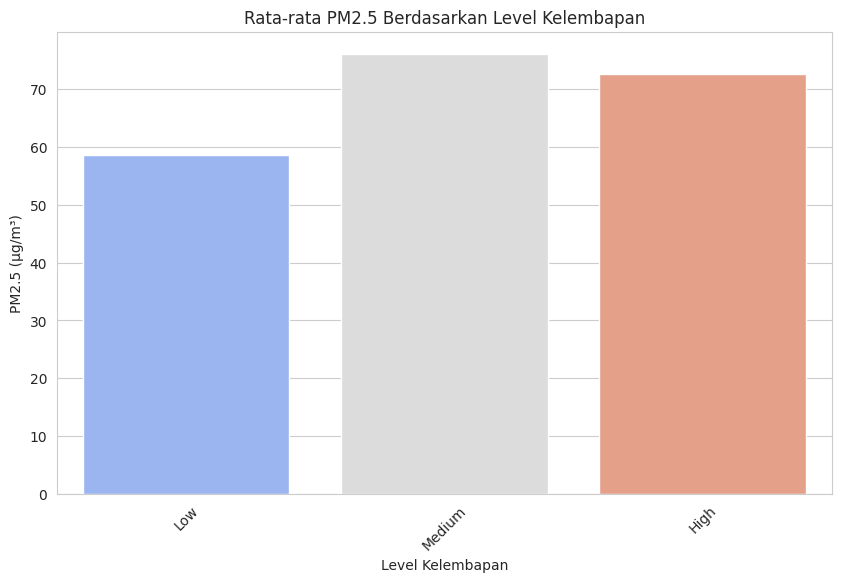

In [23]:
# Visualisasi rata-rata PM2.5 berdasarkan level kelembapan
plt.figure(figsize=(10, 6))
sns.barplot(x=humidity_avg.index, y=humidity_avg.values, hue=humidity_avg.index, palette='coolwarm', dodge=False)
plt.title('Rata-rata PM2.5 Berdasarkan Level Kelembapan')
plt.xlabel('Level Kelembapan')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

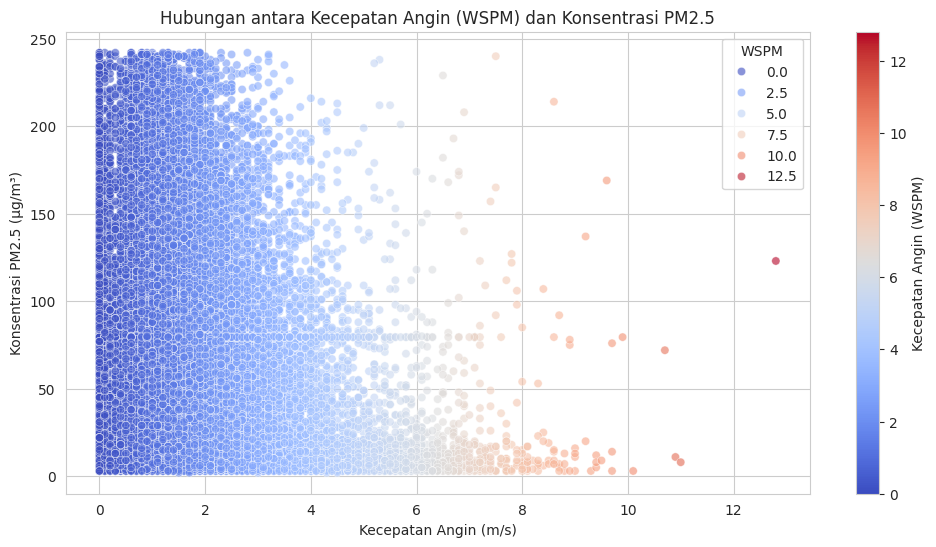

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

# Visualisasi hubungan antara kecepatan angin (WSPM) dan konsentrasi PM2.5
scatter = sns.scatterplot(x='WSPM', y='PM2.5', data=data, alpha=0.6, hue='WSPM', palette='coolwarm', ax=ax)

norm = plt.Normalize(data['WSPM'].min(), data['WSPM'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, label='Kecepatan Angin (WSPM)')

plt.title('Hubungan antara Kecepatan Angin (WSPM) dan Konsentrasi PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.show()

**Insight:**
- Konsentrasi PM2.5 cenderung lebih tinggi pada kelembapan rendah. Kelembapan yang lebih tinggi dapat membantu mengikat polutan, mengurangi konsentrasi PM2.5.
- Kecepatan angin yang lebih tinggi berhubungan dengan konsentrasi PM2.5 yang lebih rendah, menunjukkan bahwa angin berfungsi untuk mendispersikan polutan dan mencegah akumulasi

## Conclusion

- Pertanyaan 1: Analisis menunjukkan adanya variasi tahunan yang signifikan dalam konsentrasi PM2.5. Tren ini mengindikasikan potensi faktor lingkungan dan aktivitas manusia yang memengaruhi kualitas udara dari tahun ke tahun.
- Pertanyaan 2: Scatter plot antara suhu dan PM2.5 mengungkapkan adanya korelasi non-linear di mana tingkat polusi cenderung lebih tinggi pada suhu tertentu. Hal ini menunjukkan bahwa suhu dapat memengaruhi fenomena seperti inversi suhu, di mana udara dingin terperangkap di bawah lapisan udara hangat, mengakibatkan akumulasi polutan.
- Pertanyaan 3: Boxplot menunjukkan perbedaan signifikan dalam konsentrasi PM2.5 antara hari kerja dan akhir pekan. Hal ini dapat dikaitkan dengan aktivitas industri dan transportasi yang cenderung lebih rendah selama akhir pekan, mengindikasikan pengaruh langsung aktivitas manusia terhadap tingkat polusi udara.
- Pertanyaan 4: Visualisasi data perjam menunjukkan pola diurnal yang jelas, di mana konsentrasi PM2.5 meningkat pada waktu-waktu tertentu, seperti pagi dan sore hari. Pola ini dapat dikaitkan dengan jam sibuk di mana lalu lintas dan aktivitas industri meningkat, serta perubahan kondisi atmosfer seperti angin dan kelembapan.
- Pertanyaan 5: Analisis berdasarkan musim menunjukkan bahwa konsentrasi PM2.5 dapat dipengaruhi oleh musim dengan fluktuasi yang jelas antara musim, yang menunjukkan pola musiman dalam kualitas udara.
- Pertanyaan 6: Tren kualitas udara memperlihatkan bahwa kualitas cenderung menurun pada waktu tertentu, terutama selama musim panas, yang mengindikasikan perlunya strategi pengelolaan polusi yang responsif terhadap perubahan musiman.